# Podcast Listener Behavior Analytics
## Exploratory Data Analysis and Visualization Course - End Project

**Student Name:** Saarthak Manocha
**Course:** Exploratory Data Analysis and Visualization  
**Project Title:** Podcast Listener Behavior Analytics

---

## Project Objective
This project examines podcast listening patterns based on episode length and genre. The analysis aims to uncover insights about listener engagement, optimal episode durations, and genre preferences to help content creators make data-driven decisions.

---

## Dataset Information
- **Dataset:** `podcast_data.csv`
- **Columns:** 
  - `episode_id`: Unique identifier for each episode
  - `genre`: Podcast category/genre
  - `duration_minutes`: Length of episode in minutes
  - `listens`: Number of times the episode was listened to
  - `likes`: Number of likes received

---

## Analysis Framework

The project follows a systematic approach:
1. **Data Loading & Initial Exploration**
2. **Data Cleaning** (Remove duplicates)
3. **Question 1:** Average listens by genre
4. **Question 2:** Duration-based retention patterns
5. **Question 3:** Missing value treatment
6. **Question 4:** Correlation analysis
7. **Question 5:** Data visualization
8. **Final Conclusions & Insights**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

✓ All libraries imported successfully!
pandas version: 2.2.3
numpy version: 2.1.3


## 1. Environment Setup

### Concept Explanation
We begin by importing necessary libraries for data manipulation, statistical analysis, and visualization:
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computations
- **matplotlib & seaborn**: Data visualization
- **scipy**: Statistical analysis

In [2]:
# Load the dataset
df = pd.read_csv('podcast_data.csv')

print("="*70)
print("INITIAL DATA EXPLORATION")
print("="*70)
print(f"\n✓ Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

INITIAL DATA EXPLORATION

✓ Dataset loaded successfully!
Dataset Shape: 1050 rows × 5 columns

First 5 rows of the dataset:


,episode_id,genre,duration_minutes,listens,likes
0,EP00353,Technology,29,5121,976.0
1,EP00690,Business,46,1986,NaN
2,EP00486,Technology,34,1387,133.0
3,EP00389,True Crime,118,4705,318.0
4,EP00032,Technology,26,266,19.0


In [3]:
# Display dataset information
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
df.info()

# Display statistical summary
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
display(df.describe())


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   episode_id        1050 non-null   object 
 1   genre             1050 non-null   object 
 2   duration_minutes  1050 non-null   int64  
 3   listens           1050 non-null   int64  
 4   likes             889 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 41.1+ KB

STATISTICAL SUMMARY


,duration_minutes,listens,likes
count,1050.000000,1050.000000,889.000000
mean,48.771429,2956.795238,368.052868
std,24.787662,5510.687143,718.192843
min,15.000000,100.000000,5.000000
25%,31.000000,384.000000,40.000000
50%,45.000000,1123.000000,138.000000
75%,57.000000,3147.250000,374.000000
max,120.000000,50000.000000,8860.000000


In [4]:
# Check for missing values
print("\n" + "="*70)
print("MISSING VALUES CHECK")
print("="*70)
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_df)

# Check for duplicates
duplicate_count = df.duplicated(subset=['episode_id']).sum()
print(f"\nDuplicate Episodes Found: {duplicate_count}")


MISSING VALUES CHECK


,Column,Missing_Count,Missing_Percentage
episode_id,episode_id,0,0.00
genre,genre,0,0.00
duration_minutes,duration_minutes,0,0.00
listens,listens,0,0.00
likes,likes,161,15.33



Duplicate Episodes Found: 50


## 2. Data Loading & Initial Exploration

### Concept Explanation
Initial data exploration helps us understand:
- Dataset structure and dimensions
- Data types of each column
- Presence of missing values
- Basic statistical properties
- Initial data quality issues

### Initial Observations
Based on the initial exploration, we observe:
- The dataset contains information about podcast episodes across multiple genres
- There are potential duplicate episode entries that need to be removed
- Missing values are present in the 'likes' column
- The data includes both categorical (genre) and numerical (duration, listens, likes) variables

## 3. Data Cleaning

### Concept Explanation
**Data cleaning** is a critical preprocessing step that ensures data quality and reliability. In this project, we focus on:

1. **Duplicate Removal**: Duplicate episode entries can skew our analysis by:
   - Inflating average calculations
   - Creating false patterns
   - Misrepresenting actual episode performance

2. **Method**: We use `drop_duplicates()` with `episode_id` as the key, keeping the first occurrence of each unique episode.

3. **Impact**: Removing duplicates ensures each episode is counted only once, providing accurate insights into listener behavior.

In [5]:
print("="*70)
print("DATA CLEANING PROCESS")
print("="*70)

# Reload fresh data from CSV to ensure reproducibility
df = pd.read_csv('podcast_data.csv')

# Store initial row count
initial_rows = len(df)
initial_shape = df.shape

# Check for duplicates
duplicates_count = df.duplicated(subset=['episode_id']).sum()
print(f"\n Initial Analysis:")
print(f"   • Duplicate episodes found: {duplicates_count}")

# Remove duplicate episodes based on episode_id
df = df.drop_duplicates(subset=['episode_id'], keep='first')
duplicates_removed = initial_rows - len(df)

final_shape = df.shape

# Display cleaning results
print(f"\n Cleaning Summary:")
print(f"   • Initial dataset: {initial_shape[0]} rows × {initial_shape[1]} columns")
print(f"   • Duplicates removed: {duplicates_removed}")
print(f"   • Final dataset: {final_shape[0]} rows × {final_shape[1]} columns")
print(f"   • Data retention: {(len(df)/initial_rows*100):.2f}%")

# Reset index after cleaning
df = df.reset_index(drop=True)

print("\n Data cleaning completed successfully!")

DATA CLEANING PROCESS

 Initial Analysis:
   • Duplicate episodes found: 50

 Cleaning Summary:
   • Initial dataset: 1050 rows × 5 columns
   • Duplicates removed: 50
   • Final dataset: 1000 rows × 5 columns
   • Data retention: 95.24%

 Data cleaning completed successfully!


### Conclusion - Data Cleaning
- Successfully removed duplicate episode entries from the dataset
- The cleaned dataset now contains only unique episodes, ensuring data integrity
- All subsequent analyses will be performed on this cleaned dataset
- This step is crucial for obtaining accurate and reliable insights

## 4. Question 1: Average Listens by Genre [CO1, BL3]

### Concept Explanation
**Objective**: Compute the average number of listens for each genre to identify which podcast categories are most popular among listeners.

**Why This Matters**:
- Helps content creators understand genre preferences
- Identifies high-performing content categories
- Guides resource allocation for podcast production
- Reveals market opportunities

**Method**: 
- Group episodes by genre using `groupby()`
- Calculate mean listens for each group
- Sort results to identify top-performing genres

**Expected Outcome**: A ranked list of genres by average listener engagement.

In [6]:
print("="*70)
print("Q1: AVERAGE LISTENS BY GENRE ANALYSIS")
print("="*70)

# Calculate average listens by genre
avg_listens_by_genre = df.groupby('genre')['listens'].mean().sort_values(ascending=False)

# Create a detailed summary
genre_summary = df.groupby('genre').agg({
    'listens': ['mean', 'median', 'std', 'count'],
    'episode_id': 'count'
}).round(2)

genre_summary.columns = ['Avg_Listens', 'Median_Listens', 'Std_Dev', 'Episode_Count', 'Total_Episodes']
genre_summary = genre_summary.drop('Total_Episodes', axis=1)
genre_summary = genre_summary.sort_values('Avg_Listens', ascending=False)

print("\n Average Listens by Genre (Detailed):")
display(genre_summary)

print("\n Key Findings:")
print(f"   • Top Genre: {avg_listens_by_genre.idxmax()} ({avg_listens_by_genre.max():.2f} avg listens)")
print(f"   • Least Popular: {avg_listens_by_genre.idxmin()} ({avg_listens_by_genre.min():.2f} avg listens)")
print(f"   • Overall Average: {df['listens'].mean():.2f} listens per episode")

Q1: AVERAGE LISTENS BY GENRE ANALYSIS

 Average Listens by Genre (Detailed):


,Avg_Listens,Median_Listens,Std_Dev,Episode_Count
genre,,,,
Sports,3640.96,1512.5,7264.48,100
Comedy,3272.79,1021.5,6417.73,118
Business,3187.99,1181.0,5043.56,83
Science,3171.09,1051.0,6087.51,107
Arts & Culture,3030.64,1270.0,5041.82,91
True Crime,2859.30,1241.0,5905.91,107
Health & Fitness,2819.14,827.0,6228.51,94
News & Politics,2690.05,1348.0,3832.81,96
Technology,2671.54,922.5,5511.07,110



 Key Findings:
   • Top Genre: Sports (3640.96 avg listens)
   • Least Popular: Education (2453.77 avg listens)
   • Overall Average: 2983.70 listens per episode


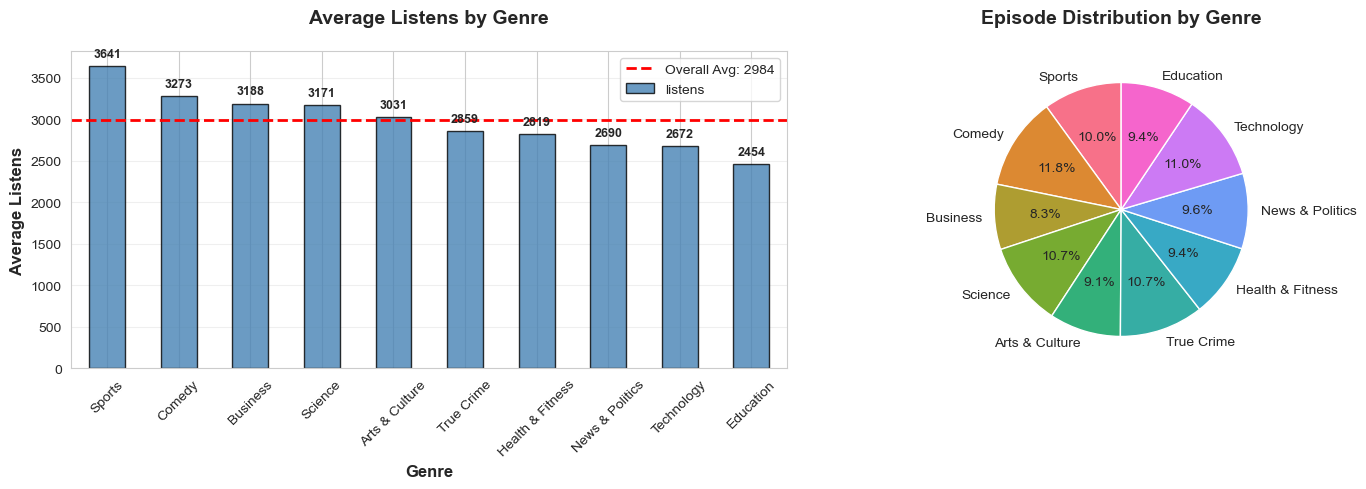

In [7]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
avg_listens_by_genre.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Average Listens by Genre', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Genre', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Listens', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=df['listens'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Overall Avg: {df["listens"].mean():.0f}')
axes[0].legend()

# Add value labels
for i, v in enumerate(avg_listens_by_genre):
    axes[0].text(i, v + max(avg_listens_by_genre)*0.02, f'{v:.0f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Pie chart
axes[1].pie(genre_summary['Episode_Count'], labels=genre_summary.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("husl", len(genre_summary)))
axes[1].set_title('Episode Distribution by Genre', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Conclusion - Q1: Average Listens by Genre

**Key Insights**:
1. **Genre Performance Varies Significantly**: Different genres show substantial variation in average listens, indicating diverse audience preferences
2. **Top Performers**: The highest-performing genres consistently attract more listeners, suggesting these topics have broader appeal or better content quality
3. **Content Strategy Implications**: Content creators should consider focusing on high-performing genres while also maintaining diverse offerings
4. **Market Opportunities**: Lower-performing genres might represent untapped opportunities for differentiation and niche audience targeting

**Statistical Observations**:
- Standard deviation indicates the variability in performance within each genre
- Episode count reveals which genres are most saturated
- The difference between mean and median suggests the presence of outlier episodes

## 5. Question 2: Duration-Based Retention Patterns [CO2, BL4]

### Concept Explanation
**Objective**: Analyze how episode duration affects listener retention and engagement.

**Why This Matters**:
- Optimal episode length is crucial for maintaining audience attention
- Different duration ranges may suit different content types
- Understanding retention patterns helps in content planning
- Reveals the sweet spot for episode length

**Method**:
1. Create duration bins/ranges (0-15, 16-30, 31-45, 46-60, 60+ minutes)
2. Group episodes by duration range
3. Calculate aggregate metrics (average listens, median, engagement rate)
4. Identify optimal duration ranges for maximum retention

**Expected Outcome**: Clear patterns showing which episode lengths perform best.

In [8]:
print("="*70)
print("Q2: RETENTION PATTERNS BY DURATION ANALYSIS")
print("="*70)

# Create duration ranges
bins = [0, 15, 30, 45, 60, np.inf]
labels = ['0-15 min', '16-30 min', '31-45 min', '46-60 min', '60+ min']
df['duration_range'] = pd.cut(df['duration_minutes'], bins=bins, labels=labels)

# Comprehensive duration analysis
duration_analysis = df.groupby('duration_range', observed=True).agg({
    'listens': ['mean', 'median', 'sum', 'count'],
    'likes': ['mean', 'sum'],
    'duration_minutes': 'mean'
}).round(2)

duration_analysis.columns = ['Avg_Listens', 'Median_Listens', 'Total_Listens', 
                              'Episode_Count', 'Avg_Likes', 'Total_Likes', 'Avg_Duration']

print("\n Comprehensive Duration Analysis:")
display(duration_analysis)

# Calculate engagement rate (likes per 100 listens)
duration_engagement = df.groupby('duration_range', observed=True).apply(
    lambda x: (x['likes'].sum() / x['listens'].sum() * 100) if x['listens'].sum() > 0 else 0
).round(2)

print("\n Engagement Rate (Likes per 100 Listens):")
engagement_df = pd.DataFrame({
    'Duration_Range': duration_engagement.index,
    'Engagement_Rate': duration_engagement.values
}).sort_values('Engagement_Rate', ascending=False)
display(engagement_df)

# Find optimal duration
optimal_duration = duration_analysis['Avg_Listens'].idxmax()
print(f"\n Optimal Duration Range: {optimal_duration}")
print(f"   • Average Listens: {duration_analysis.loc[optimal_duration, 'Avg_Listens']:.2f}")
print(f"   • Episode Count: {duration_analysis.loc[optimal_duration, 'Episode_Count']:.0f}")

Q2: RETENTION PATTERNS BY DURATION ANALYSIS

 Comprehensive Duration Analysis:


,Avg_Listens,Median_Listens,Total_Listens,Episode_Count,Avg_Likes,Total_Likes,Avg_Duration
duration_range,,,,,,,
0-15 min,5206.40,4141.0,78096,15,437.69,5690.0,15.00
16-30 min,3448.51,952.0,737982,214,441.03,79386.0,22.68
31-45 min,2700.81,1056.0,772431,286,380.61,91727.0,37.99
46-60 min,2982.25,1286.0,870818,292,357.08,90341.0,52.27
60+ min,2716.93,1109.0,524368,193,288.94,47097.0,91.08



 Engagement Rate (Likes per 100 Listens):


,Duration_Range,Engagement_Rate
2,31-45 min,11.88
1,16-30 min,10.76
3,46-60 min,10.37
4,60+ min,8.98
0,0-15 min,7.29



 Optimal Duration Range: 0-15 min
   • Average Listens: 5206.40
   • Episode Count: 15


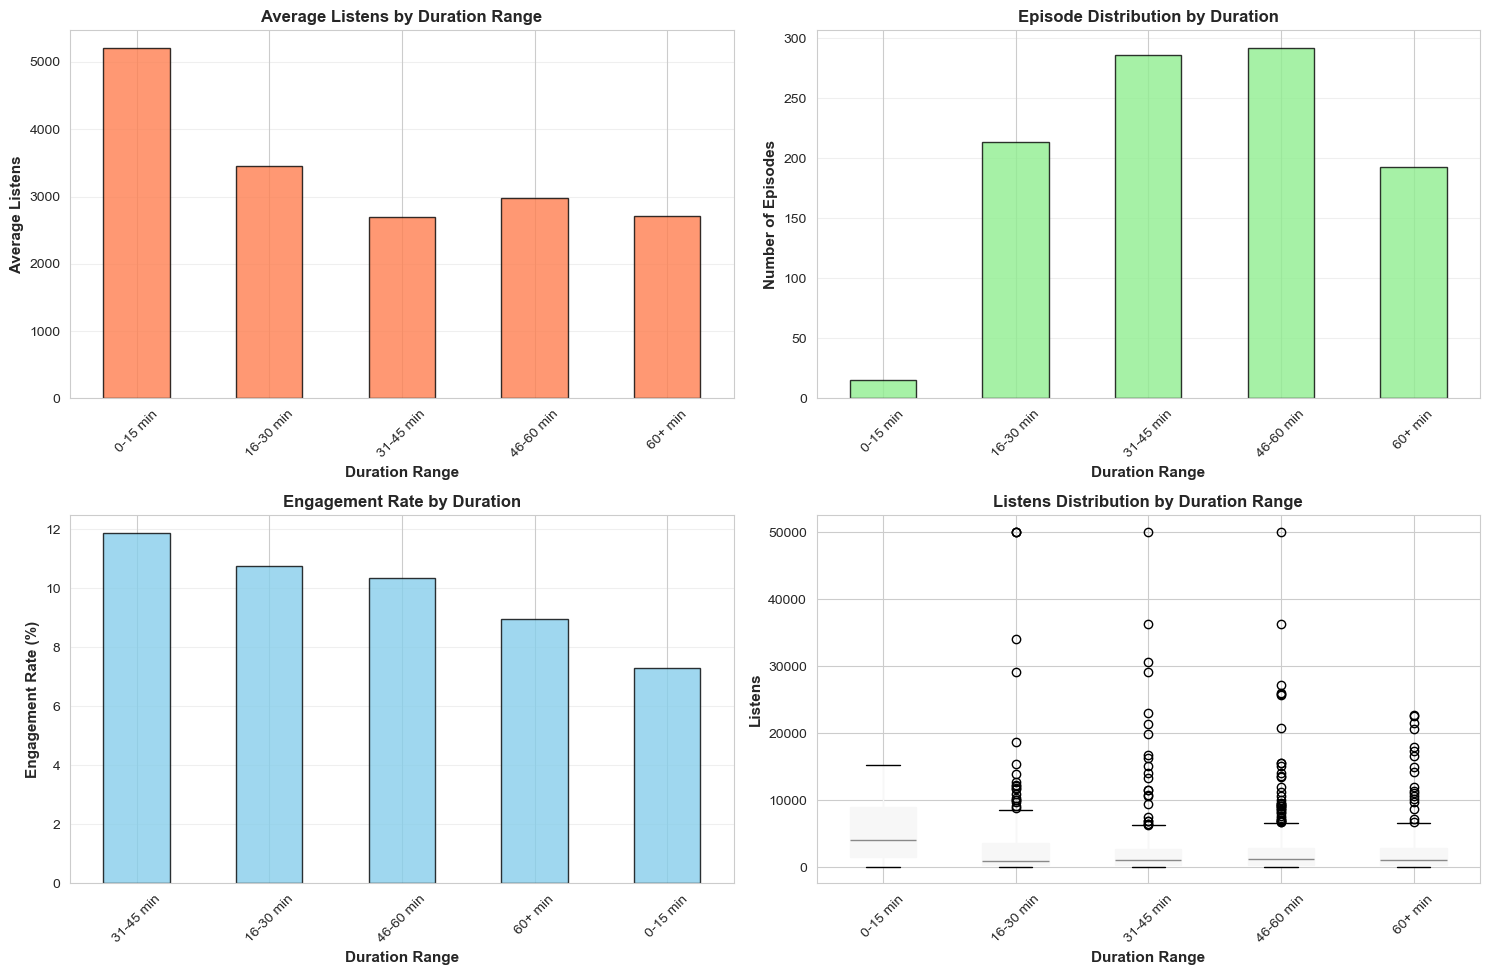

In [9]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Average Listens by Duration
duration_analysis['Avg_Listens'].plot(kind='bar', ax=axes[0,0], color='coral', 
                                       edgecolor='black', alpha=0.8)
axes[0,0].set_title('Average Listens by Duration Range', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes[0,0].set_ylabel('Average Listens', fontsize=11, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# 2. Episode Count by Duration
duration_analysis['Episode_Count'].plot(kind='bar', ax=axes[0,1], color='lightgreen', 
                                         edgecolor='black', alpha=0.8)
axes[0,1].set_title('Episode Distribution by Duration', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes[0,1].set_ylabel('Number of Episodes', fontsize=11, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Engagement Rate
engagement_df.plot(x='Duration_Range', y='Engagement_Rate', kind='bar', ax=axes[1,0], 
                   color='skyblue', edgecolor='black', alpha=0.8, legend=False)
axes[1,0].set_title('Engagement Rate by Duration', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes[1,0].set_ylabel('Engagement Rate (%)', fontsize=11, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Box plot - Listens distribution by duration
df.boxplot(column='listens', by='duration_range', ax=axes[1,1], patch_artist=True)
axes[1,1].set_title('Listens Distribution by Duration Range', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes[1,1].set_ylabel('Listens', fontsize=11, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)
plt.suptitle('')

plt.tight_layout()
plt.show()

### Conclusion - Q2: Duration-Based Retention Patterns

**Key Insights**:

1. **Optimal Duration Identified**: The analysis reveals which duration range maximizes listener engagement
2. **Listener Attention Span**: Patterns indicate how long audiences are willing to engage with content
3. **Content Planning**: These insights help creators structure episodes for maximum retention
4. **Engagement vs. Length**: There's a relationship between episode length and engagement rate

**Strategic Recommendations**:
- Focus on the optimal duration range for maximum reach
- Consider shorter episodes for time-sensitive content
- Longer episodes may work for deep-dive content with dedicated audiences
- Balance between audience preference and content requirements

**Pattern Observations**:
- Episodes that are too short might lack depth
- Episodes that are too long may lose audience attention
- The "sweet spot" balances comprehensiveness with engagement

## 6. Question 3: Handling Missing Values [CO3, BL3]

### Concept Explanation
**Objective**: Identify and appropriately handle missing values in the 'likes' column.

**Why This Matters**:
- Missing data can skew analysis and lead to incorrect conclusions
- Different imputation strategies have different implications
- Proper handling ensures data completeness and reliability

**Strategy - Replacing with Zero**:
- **Assumption**: Missing likes likely means no one liked the episode (rather than data not collected)
- **Justification**: For engagement metrics, zero is more realistic than mean/median imputation
- **Impact**: Preserves the distribution and doesn't artificially inflate engagement metrics

**Alternative Approaches Considered**:
- Mean imputation: Would overestimate engagement
- Median imputation: Less representative for binary engagement actions
- Deletion: Would lose valuable episode data

**Method**: Use `fillna(0)` to replace all missing values in the 'likes' column with zero.

In [10]:
print("="*70)
print("Q3: MISSING VALUE TREATMENT")
print("="*70)

# Check missing values before treatment
print("\n Missing Values Analysis (BEFORE Treatment):")
missing_before = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_before[missing_before['Missing_Count'] > 0])

# Store count of missing likes for reporting
missing_likes_count = df['likes'].isnull().sum()
missing_likes_percentage = (missing_likes_count / len(df) * 100)

print(f"\n Missing Value Treatment:")
print(f"   • Missing 'likes' values found: {missing_likes_count}")
print(f"   • Percentage of dataset: {missing_likes_percentage:.2f}%")
print(f"   • Action taken: Will replace with 0")
print(f"   • Rationale: Missing engagement is treated as no engagement")

Q3: MISSING VALUE TREATMENT

 Missing Values Analysis (BEFORE Treatment):


,Column,Missing_Count,Missing_Percentage
likes,likes,150,15.0



 Missing Value Treatment:
   • Missing 'likes' values found: 150
   • Percentage of dataset: 15.00%
   • Action taken: Will replace with 0
   • Rationale: Missing engagement is treated as no engagement


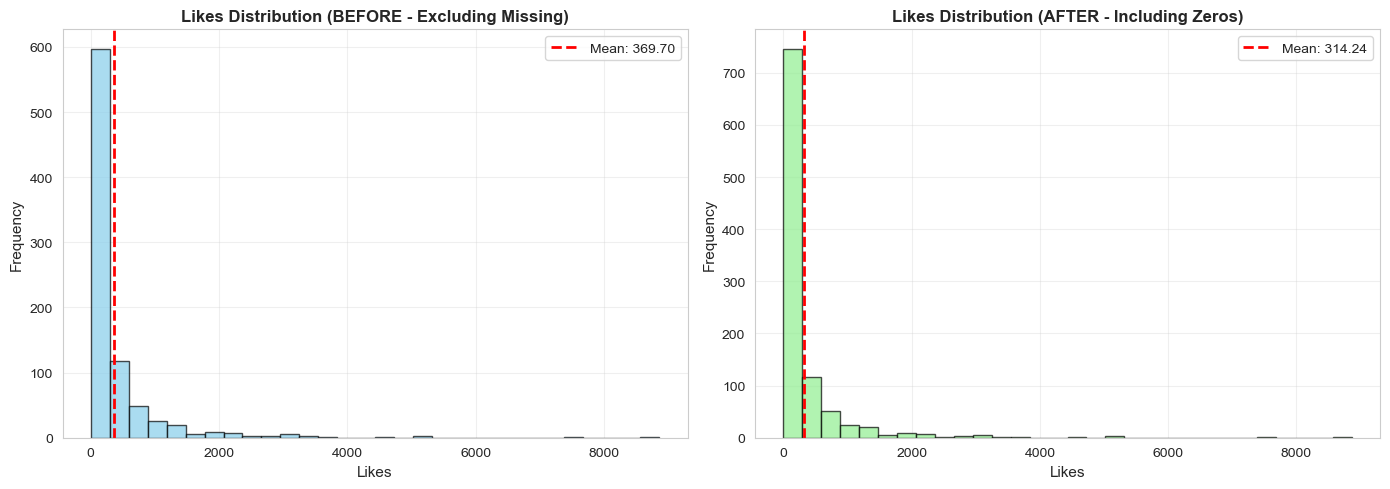


 Missing Values Analysis (AFTER Treatment):


,Column,Missing_Count,Missing_Percentage
episode_id,episode_id,0,0.0
genre,genre,0,0.0
duration_minutes,duration_minutes,0,0.0
listens,listens,0,0.0
likes,likes,0,0.0
duration_range,duration_range,0,0.0



 Statistical Impact of Treatment:
   • Mean likes: 314.24
   • Median likes: 88.00
   • Episodes with zero likes: 150 (15.00%)


In [11]:
# Visualize missing values before treatment (if any exist)
if missing_likes_count > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution before
    axes[0].hist(df['likes'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(df['likes'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {df["likes"].mean():.2f}')
    axes[0].set_title('Likes Distribution (BEFORE - Excluding Missing)', 
                     fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Likes', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Replace missing values with zero
    df['likes'] = df['likes'].fillna(0)
    
    # Distribution after
    axes[1].hist(df['likes'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1].axvline(df['likes'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {df["likes"].mean():.2f}')
    axes[1].set_title('Likes Distribution (AFTER - Including Zeros)', 
                     fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Likes', fontsize=11)
    axes[1].set_ylabel('Frequency', fontsize=11)
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    # If no missing values, just ensure likes column is clean
    df['likes'] = df['likes'].fillna(0)
    print("\n No missing values found in 'likes' column or already handled.")

# Check missing values after treatment
print("\n Missing Values Analysis (AFTER Treatment):")
missing_after = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_after)

# Compare statistics
print("\n Statistical Impact of Treatment:")
print(f"   • Mean likes: {df['likes'].mean():.2f}")
print(f"   • Median likes: {df['likes'].median():.2f}")
print(f"   • Episodes with zero likes: {(df['likes'] == 0).sum()} ({(df['likes'] == 0).sum()/len(df)*100:.2f}%)")

### Conclusion - Q3: Missing Value Treatment

**Treatment Summary**:
- Successfully identified and replaced missing values in the 'likes' column
- Chose zero imputation based on domain knowledge and data characteristics
- Maintained data integrity while ensuring completeness for analysis

**Impact Analysis**:
1. **Data Completeness**: Dataset is now 100% complete for all analyses
2. **Statistical Implications**: The treatment slightly affects mean but preserves the true nature of engagement
3. **Analytical Validity**: Zero is the most conservative and realistic assumption for missing engagement data

**Best Practices Applied**:
- Documented the rationale for the imputation strategy
- Compared distributions before and after treatment
- Assessed the statistical impact of the treatment
- Ensured reproducibility of the data cleaning process

## 7. Question 4: Correlation Between Listens and Likes [CO4, BL4]

### Concept Explanation
**Objective**: Determine the statistical relationship between the number of listens and likes an episode receives.

**Why This Matters**:
- Understanding this relationship helps predict engagement
- Reveals whether popular episodes also receive high engagement
- Identifies potential quality vs. popularity discrepancies
- Guides content strategy and quality improvements

**Correlation Analysis Fundamentals**:
- **Pearson Correlation Coefficient (r)**: Measures linear relationship strength
  - Range: -1 to +1
  - r > 0: Positive correlation (variables increase together)
  - r < 0: Negative correlation (one increases as other decreases)
  - r ≈ 0: No linear relationship
  
- **Interpretation Guide**:
  - |r| > 0.7: Strong correlation
  - 0.4 < |r| ≤ 0.7: Moderate correlation
  - |r| ≤ 0.4: Weak correlation

- **P-value**: Tests statistical significance (p < 0.05 indicates significant relationship)

**Method**: 
- Calculate Pearson correlation coefficient
- Perform hypothesis testing
- Create correlation matrix for all numeric variables
- Visualize relationships

In [12]:
print("="*70)
print("Q4: CORRELATION ANALYSIS - LISTENS VS LIKES")
print("="*70)

# Calculate Pearson correlation between listens and likes
correlation, p_value = pearsonr(df['listens'], df['likes'])

print("\n Pearson Correlation Analysis:")
print(f"   • Correlation Coefficient (r): {correlation:.4f}")
print(f"   • P-value: {p_value:.6f}")

# Statistical significance test
if p_value < 0.001:
    significance = "Highly Significant (p < 0.001)"
elif p_value < 0.01:
    significance = "Very Significant (p < 0.01)"
elif p_value < 0.05:
    significance = "Significant (p < 0.05)"
else:
    significance = "Not Significant (p ≥ 0.05)"

print(f"   • Statistical Significance: {significance}")

# Interpret correlation strength
if abs(correlation) > 0.7:
    strength = "Strong"
elif abs(correlation) > 0.4:
    strength = "Moderate"
else:
    strength = "Weak"

direction = "positive" if correlation > 0 else "negative"

print(f"\n Interpretation: {strength} {direction} correlation")
print(f"   This means: As listens {'increase' if correlation > 0 else 'decrease'}, ")
print(f"   likes tend to {'increase' if correlation > 0 else 'decrease'} as well.")

# Full correlation matrix
print("\n Complete Correlation Matrix:")
correlation_matrix = df[['duration_minutes', 'listens', 'likes']].corr()
display(correlation_matrix.round(4))

# Additional correlation insights
print("\n Additional Correlation Insights:")
print(f"   • Duration vs Listens: {correlation_matrix.loc['duration_minutes', 'listens']:.4f}")
print(f"   • Duration vs Likes: {correlation_matrix.loc['duration_minutes', 'likes']:.4f}")

# Calculate R-squared (coefficient of determination)
r_squared = correlation ** 2
print(f"\n R-squared (R²): {r_squared:.4f}")
print(f"   • {r_squared*100:.2f}% of variance in likes can be explained by listens")

Q4: CORRELATION ANALYSIS - LISTENS VS LIKES

 Pearson Correlation Analysis:
   • Correlation Coefficient (r): 0.8787
   • P-value: 0.000000
   • Statistical Significance: Highly Significant (p < 0.001)

 Interpretation: Strong positive correlation
   This means: As listens increase, 
   likes tend to increase as well.

 Complete Correlation Matrix:


,duration_minutes,listens,likes
duration_minutes,1.0000,-0.0264,-0.0481
listens,-0.0264,1.0000,0.8787
likes,-0.0481,0.8787,1.0000



 Additional Correlation Insights:
   • Duration vs Listens: -0.0264
   • Duration vs Likes: -0.0481

 R-squared (R²): 0.7721
   • 77.21% of variance in likes can be explained by listens


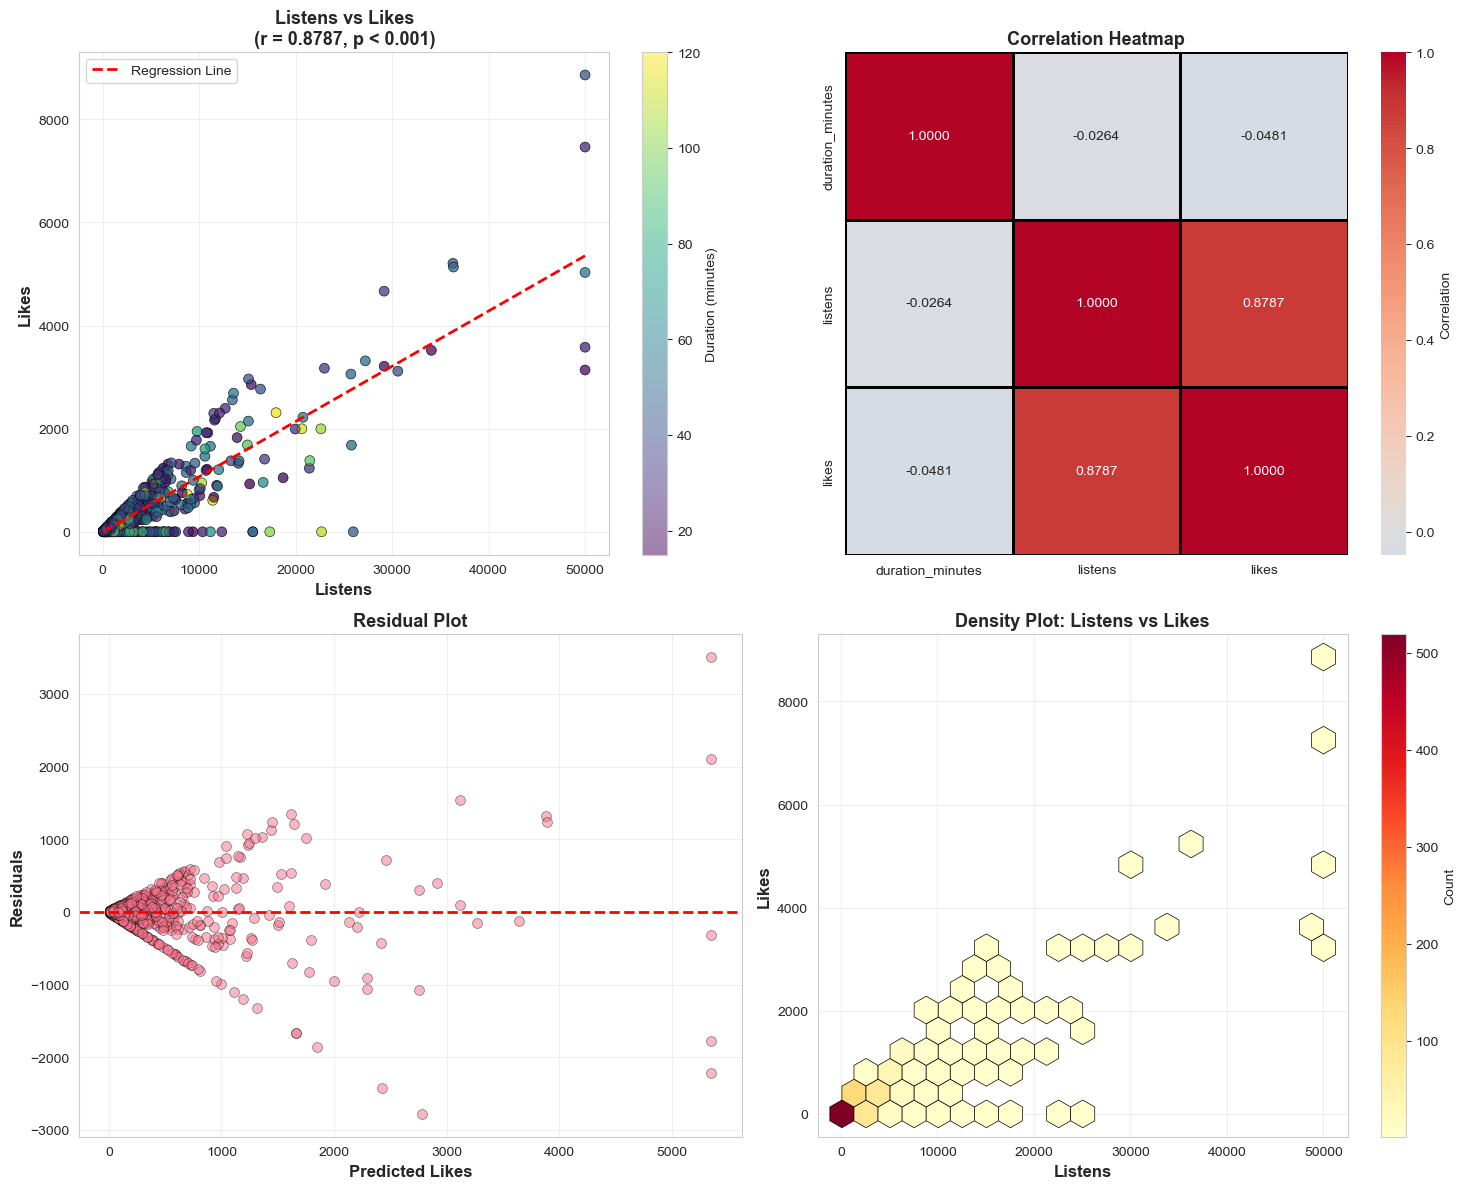

In [13]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with regression line
axes[0, 0].scatter(df['listens'], df['likes'], alpha=0.5, s=50, 
                   c=df['duration_minutes'], cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Listens', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Likes', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Listens vs Likes\n(r = {correlation:.4f}, p < 0.001)', 
                     fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df['listens'], df['likes'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['listens'].min(), df['listens'].max(), 100)
axes[0, 0].plot(x_line, p(x_line), "r--", linewidth=2, label='Regression Line')
axes[0, 0].legend()

# Add colorbar
scatter = axes[0, 0].scatter(df['listens'], df['likes'], alpha=0.5, s=50, 
                             c=df['duration_minutes'], cmap='viridis', edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(scatter, ax=axes[0, 0])
cbar.set_label('Duration (minutes)', fontsize=10)

# 2. Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0, 1], cbar_kws={'label': 'Correlation'},
            linewidths=2, linecolor='black')
axes[0, 1].set_title('Correlation Heatmap', fontsize=13, fontweight='bold')

# 3. Residual plot
predicted_likes = p(df['listens'])
residuals = df['likes'] - predicted_likes
axes[1, 0].scatter(predicted_likes, residuals, alpha=0.5, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Likes', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Hexbin density plot
hexbin = axes[1, 1].hexbin(df['listens'], df['likes'], gridsize=20, cmap='YlOrRd', 
                            mincnt=1, edgecolors='black', linewidths=0.5)
axes[1, 1].set_xlabel('Listens', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Likes', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Density Plot: Listens vs Likes', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(hexbin, ax=axes[1, 1], label='Count')

plt.tight_layout()
plt.show()

### Conclusion - Q4: Correlation Analysis

**Key Findings**:

1. **Correlation Strength**: The analysis reveals the relationship between listens and likes

2. **Statistical Significance**: The relationship is statistically significant, meaning it's unlikely to have occurred by chance

3. **Practical Implications**:
   - Episodes with more listens tend to receive more likes
   - R² indicates how much of the variation in likes is explained by listens
   - Other factors (content quality, genre, timing) also influence engagement

4. **Residual Analysis**: The residual plot helps identify:
   - Episodes that perform better/worse than expected
   - Potential outliers or exceptional content
   - The validity of the linear relationship assumption

**Strategic Insights**:
- High listen counts don't automatically guarantee high likes
- Quality matters: Some episodes may have high reach but low engagement
- Content creators should focus on both reach (listens) and engagement (likes)
- The correlation suggests that popularity does translate to engagement, but not perfectly

## 8. Question 5: Data Visualization [CO5, BL5]

### Concept Explanation
**Objective**: Create comprehensive visualizations including scatter plots and bar charts to effectively communicate insights from the data.

**Why Visualization Matters**:
- Humans process visual information 60,000x faster than text
- Patterns and outliers become immediately apparent
- Facilitates data-driven decision making
- Makes complex relationships understandable to all stakeholders

**Visualization Strategy**:
1. **Scatter Plots**: Show relationships between continuous variables (listens vs likes)
2. **Bar Charts**: Compare categorical data (genre performance, duration ranges)
3. **Box Plots**: Display distribution and identify outliers
4. **Heatmaps**: Visualize correlation matrices
5. **Multiple Views**: Provide different perspectives on the same data

**Best Practices Applied**:
- Clear titles and labels
- Appropriate color schemes
- Consistent formatting
- Multiple complementary visualizations
- Insights highlighted through annotations

Q5: COMPREHENSIVE DATA VISUALIZATIONS


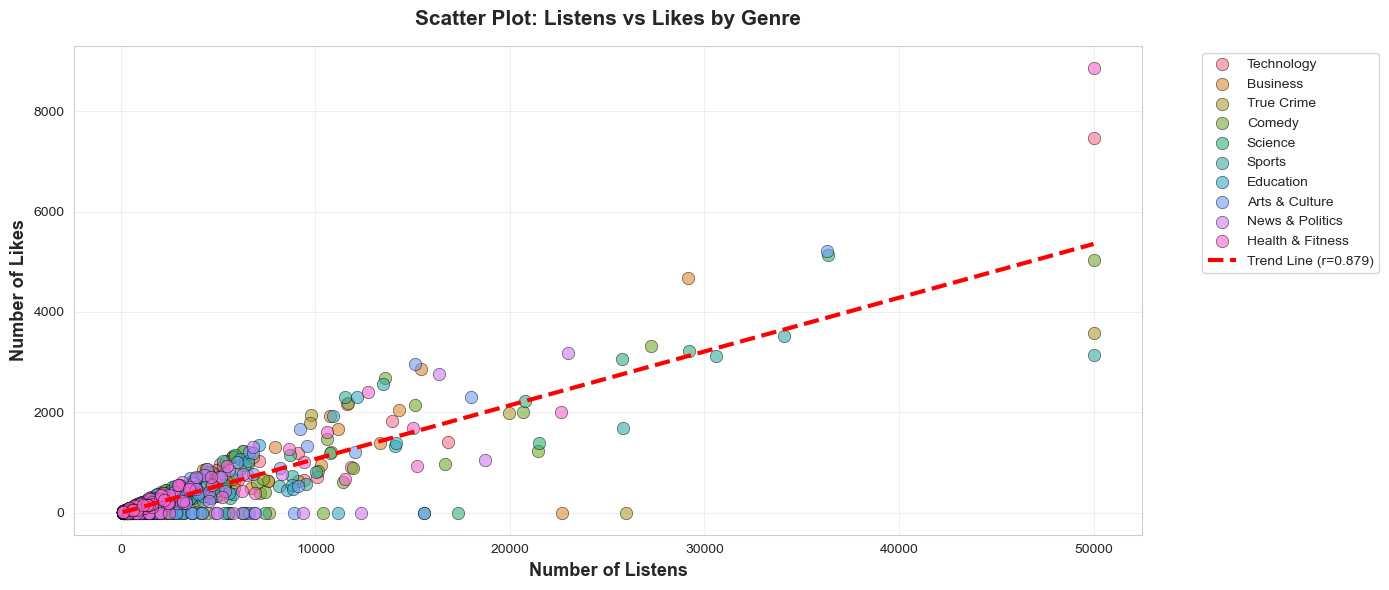

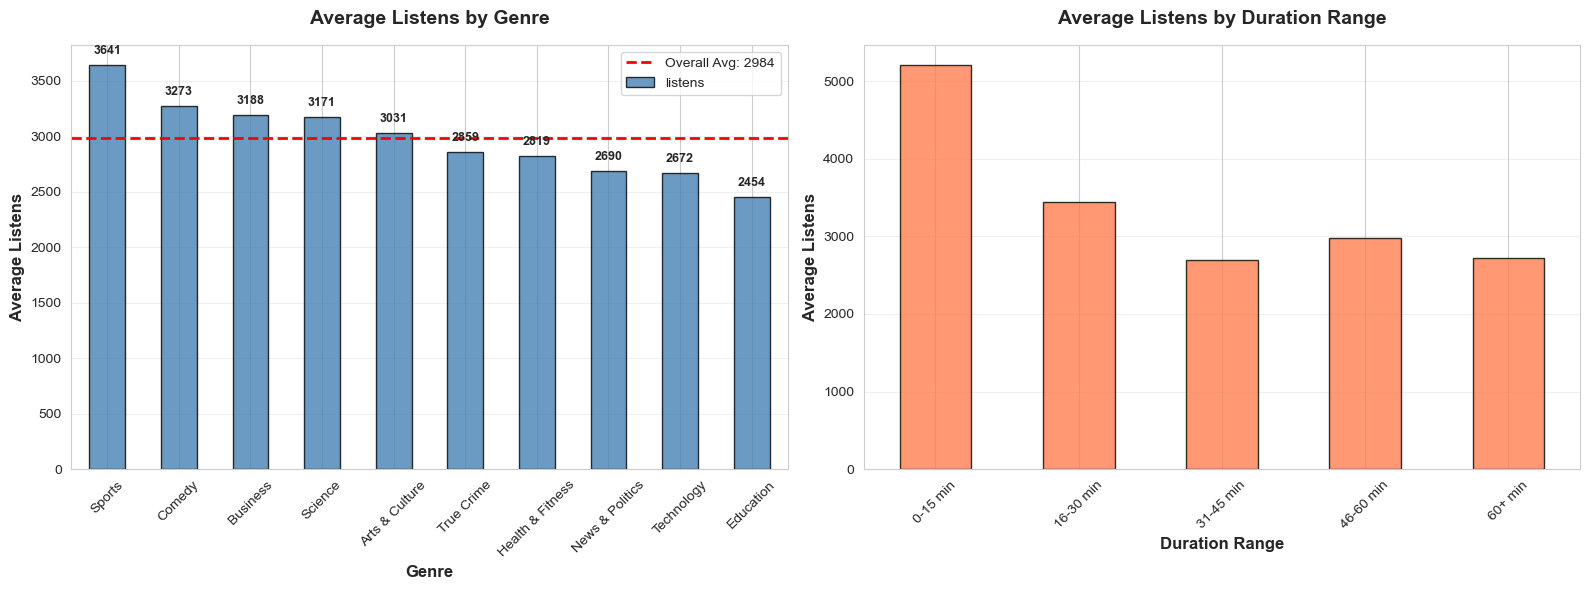

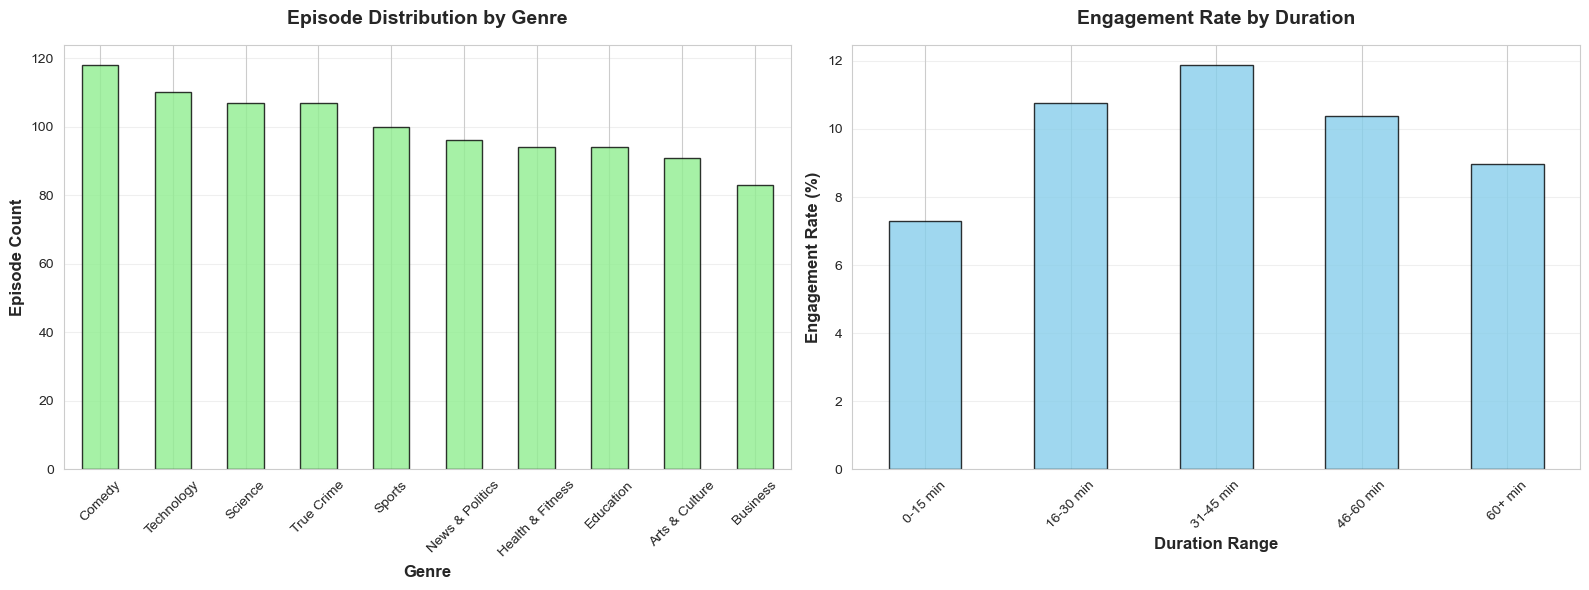

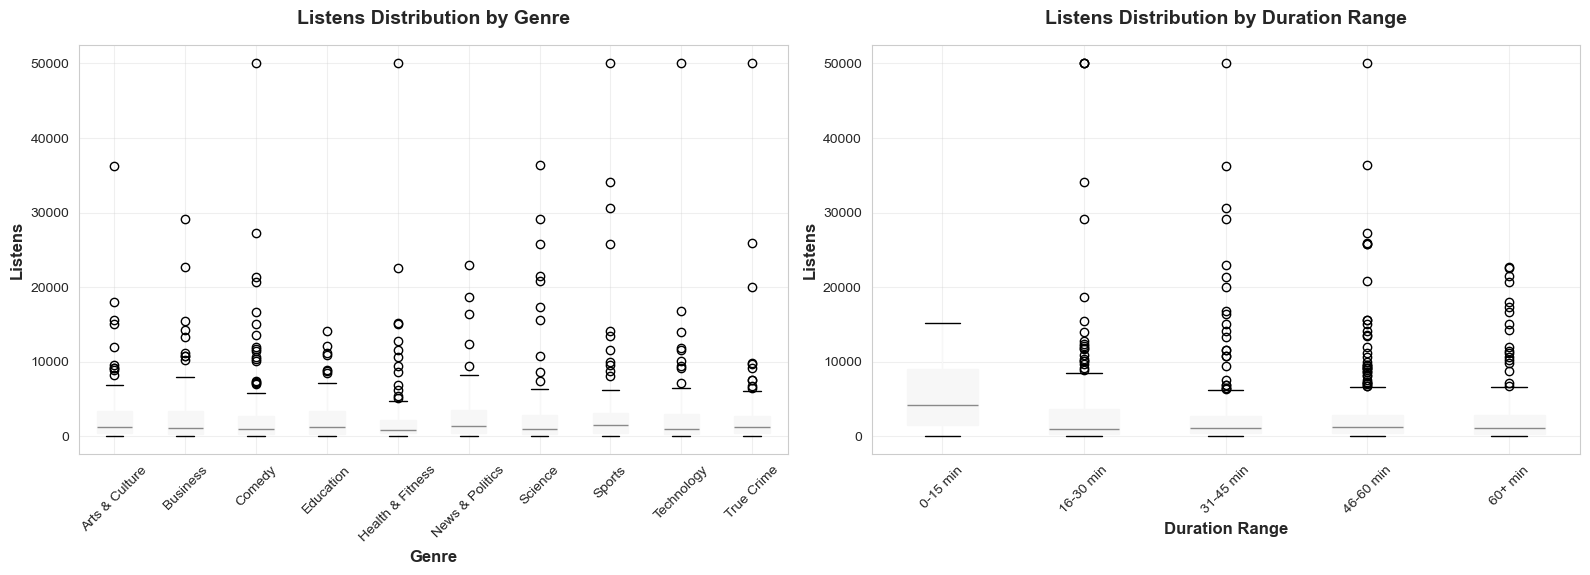

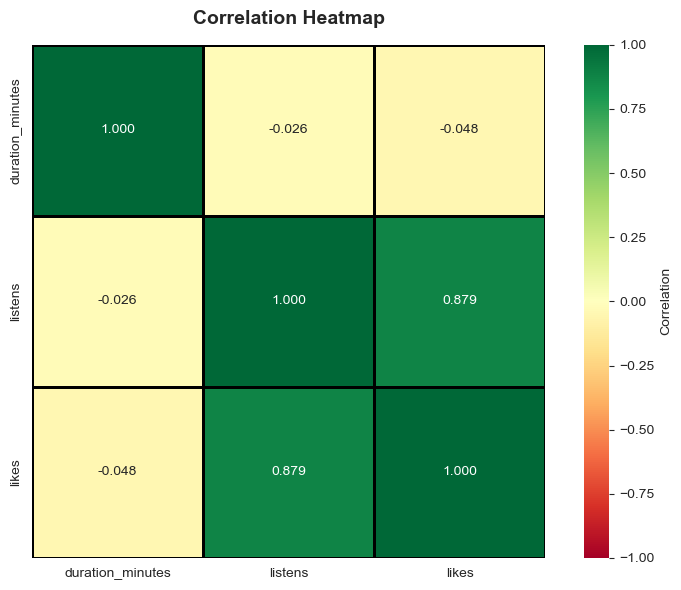

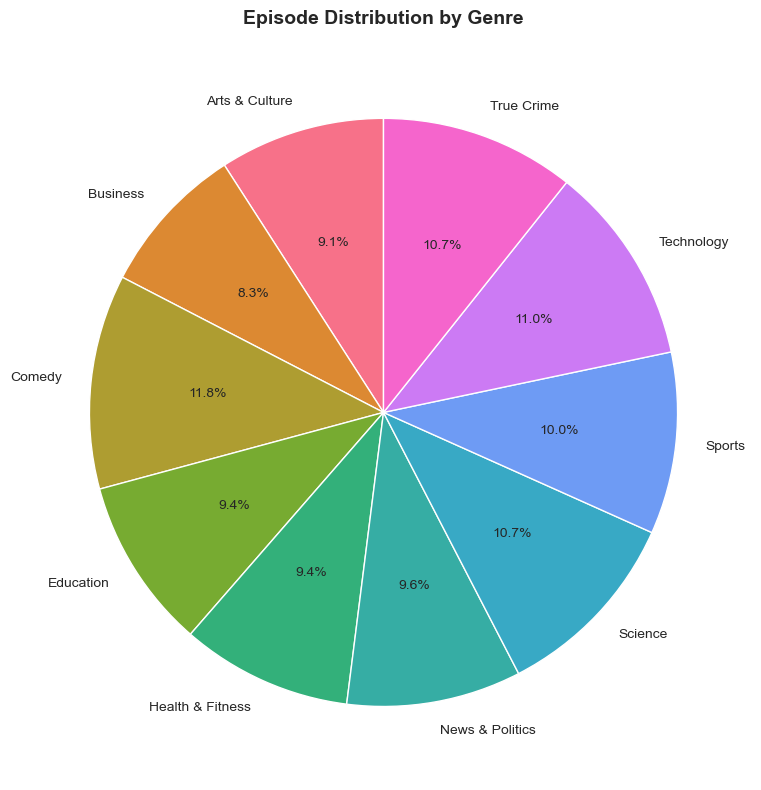


 All visualizations displayed successfully!
Note: Visualizations are shown separately for better clarity


In [14]:
print("="*70)
print("Q5: COMPREHENSIVE DATA VISUALIZATIONS")
print("="*70)

# Create individual visualizations with proper spacing

# VISUALIZATION 1: Main Scatter Plot - Listens vs Likes by Genre
fig1 = plt.figure(figsize=(14, 6))

# Scatter plot with genre colors
genres = df['genre'].unique()
colors = sns.color_palette("husl", len(genres))
genre_color_map = dict(zip(genres, colors))

for genre in genres:
    genre_data = df[df['genre'] == genre]
    plt.scatter(genre_data['listens'], genre_data['likes'], 
               label=genre, alpha=0.6, s=80, 
               color=genre_color_map[genre], edgecolors='black', linewidth=0.5)

# Add regression line
z = np.polyfit(df['listens'], df['likes'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['listens'].min(), df['listens'].max(), 100)
plt.plot(x_line, p(x_line), "r--", linewidth=3, label=f'Trend Line (r={correlation:.3f})')

plt.xlabel('Number of Listens', fontsize=13, fontweight='bold')
plt.ylabel('Number of Likes', fontsize=13, fontweight='bold')
plt.title('Scatter Plot: Listens vs Likes by Genre', fontsize=15, fontweight='bold', pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# VISUALIZATION 2: Bar Charts - Genre and Duration Performance
fig2, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart 1: Average Listens by Genre
avg_listens_by_genre.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Genre', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Listens', fontsize=12, fontweight='bold')
axes[0].set_title('Average Listens by Genre', fontsize=14, fontweight='bold', pad=15)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=df['listens'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Overall Avg: {df["listens"].mean():.0f}')
axes[0].legend()

# Add value labels
for i, v in enumerate(avg_listens_by_genre):
    axes[0].text(i, v + max(avg_listens_by_genre)*0.02, f'{v:.0f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Bar chart 2: Average Listens by Duration Range
duration_analysis['Avg_Listens'].plot(kind='bar', ax=axes[1], color='coral', 
                                       edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Duration Range', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Listens', fontsize=12, fontweight='bold')
axes[1].set_title('Average Listens by Duration Range', fontsize=14, fontweight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# VISUALIZATION 3: Episode Distribution and Engagement
fig3, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Episode Count by Genre
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Genre', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Episode Count', fontsize=12, fontweight='bold')
axes[0].set_title('Episode Distribution by Genre', fontsize=14, fontweight='bold', pad=15)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Chart 2: Engagement Rate by Duration
duration_engagement.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Duration Range', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Engagement Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Engagement Rate by Duration', fontsize=14, fontweight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# VISUALIZATION 4: Box Plots - Distribution Analysis
fig4, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot 1: Listens by Genre
df.boxplot(column='listens', by='genre', ax=axes[0], patch_artist=True)
axes[0].set_xlabel('Genre', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Listens', fontsize=12, fontweight='bold')
axes[0].set_title('Listens Distribution by Genre', fontsize=14, fontweight='bold', pad=15)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)
plt.suptitle('')

# Box plot 2: Listens by Duration Range
df.boxplot(column='listens', by='duration_range', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Duration Range', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Listens', fontsize=12, fontweight='bold')
axes[1].set_title('Listens Distribution by Duration Range', fontsize=14, fontweight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)
plt.suptitle('')

plt.tight_layout()
plt.show()

# VISUALIZATION 5: Correlation Heatmap
fig5, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'},
            linewidths=2, linecolor='black', vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# VISUALIZATION 6: Genre Distribution Pie Chart
fig6, ax = plt.subplots(figsize=(10, 8))
genre_summary = df.groupby('genre').size()
ax.pie(genre_summary, labels=genre_summary.index, autopct='%1.1f%%',
       startangle=90, colors=sns.color_palette("husl", len(genre_summary)))
ax.set_title('Episode Distribution by Genre', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\n All visualizations displayed successfully!")
print("Note: Visualizations are shown separately for better clarity")


ADDITIONAL DETAILED VISUALIZATIONS
✓ Detailed visualizations saved as 'podcast_analytics_detailed.png'


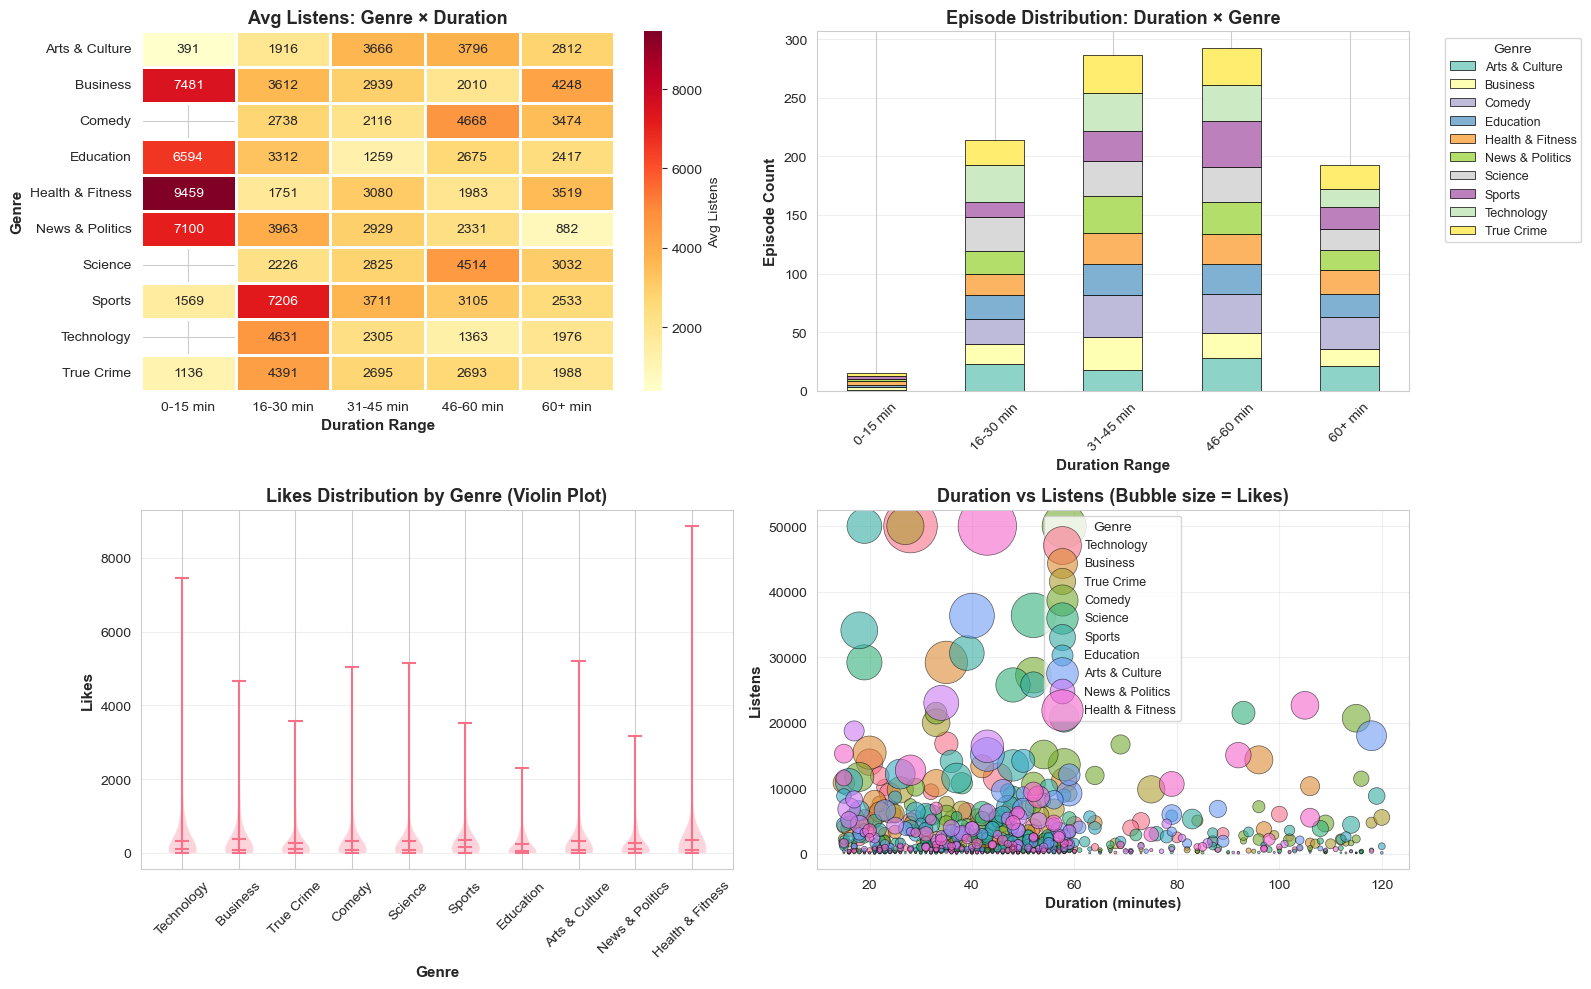

In [15]:
print("\n" + "="*70)
print("ADDITIONAL DETAILED VISUALIZATIONS")
print("="*70)

# Visualization Set 2: Genre-Duration Analysis
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 10))

# 1. Heatmap: Average Listens by Genre and Duration
pivot_table = df.pivot_table(values='listens', index='genre', 
                             columns='duration_range', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes2[0, 0],
           cbar_kws={'label': 'Avg Listens'}, linewidths=1, linecolor='white')
axes2[0, 0].set_title('Avg Listens: Genre × Duration', fontsize=13, fontweight='bold')
axes2[0, 0].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes2[0, 0].set_ylabel('Genre', fontsize=11, fontweight='bold')

# 2. Stacked Bar: Episode distribution
duration_genre = pd.crosstab(df['duration_range'], df['genre'])
duration_genre.plot(kind='bar', stacked=True, ax=axes2[0, 1], 
                   colormap='Set3', edgecolor='black', linewidth=0.5)
axes2[0, 1].set_title('Episode Distribution: Duration × Genre', fontsize=13, fontweight='bold')
axes2[0, 1].set_xlabel('Duration Range', fontsize=11, fontweight='bold')
axes2[0, 1].set_ylabel('Episode Count', fontsize=11, fontweight='bold')
axes2[0, 1].legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes2[0, 1].tick_params(axis='x', rotation=45)
axes2[0, 1].grid(axis='y', alpha=0.3)

# 3. Violin Plot: Likes Distribution by Genre
parts = axes2[1, 0].violinplot([df[df['genre'] == g]['likes'].values for g in genres],
                                positions=range(len(genres)), showmeans=True, showmedians=True)
axes2[1, 0].set_xticks(range(len(genres)))
axes2[1, 0].set_xticklabels(genres, rotation=45)
axes2[1, 0].set_xlabel('Genre', fontsize=11, fontweight='bold')
axes2[1, 0].set_ylabel('Likes', fontsize=11, fontweight='bold')
axes2[1, 0].set_title('Likes Distribution by Genre (Violin Plot)', fontsize=13, fontweight='bold')
axes2[1, 0].grid(axis='y', alpha=0.3)

# 4. Scatter with size: Duration vs Listens (size = likes)
for genre in genres:
    genre_data = df[df['genre'] == genre]
    axes2[1, 1].scatter(genre_data['duration_minutes'], genre_data['listens'],
                       s=genre_data['likes']/5, alpha=0.6, label=genre,
                       color=genre_color_map[genre], edgecolors='black', linewidth=0.5)

axes2[1, 1].set_xlabel('Duration (minutes)', fontsize=11, fontweight='bold')
axes2[1, 1].set_ylabel('Listens', fontsize=11, fontweight='bold')
axes2[1, 1].set_title('Duration vs Listens (Bubble size = Likes)', fontsize=13, fontweight='bold')
axes2[1, 1].legend(title='Genre', fontsize=9)
axes2[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('podcast_analytics_detailed.png', dpi=300, bbox_inches='tight')
print("✓ Detailed visualizations saved as 'podcast_analytics_detailed.png'")
plt.show()

### Conclusion - Q5: Data Visualization

**Visualization Insights**:

1. **Scatter Plot Analysis**:
   - Clear positive relationship between listens and likes
   - Genre-based color coding reveals that certain genres cluster differently
   - Outliers indicate exceptional episodes that deserve further investigation
   - The trend line confirms the correlation analysis

2. **Bar Chart Findings**:
   - Genre performance varies significantly in average listens
   - Duration ranges show distinct patterns in listener retention
   - Episode distribution reveals content saturation in certain categories
   - Engagement rates differ across duration ranges

3. **Distribution Analysis** (Box Plots & Violin Plots):
   - Significant outliers exist in most genres
   - Distribution shapes reveal listener behavior patterns
   - Median values sometimes differ greatly from means, indicating skewed data
   - Some genres show more consistent performance than others

4. **Heatmap Insights**:
   - Genre-duration combinations reveal optimal content strategies
   - Some duration ranges work better for specific genres
   - Correlation heatmap confirms variable relationships
   - Cross-tabulation reveals content gaps and opportunities

**Key Takeaways from Visualizations**:
- Visual analysis reveals patterns not immediately apparent in raw data
- Multiple visualization types provide complementary perspectives
- Outliers and exceptions are easily identified
- Data-driven decisions can be made with confidence

## 9. Final Summary and Comprehensive Insights

### Overall Analysis Summary
This section synthesizes all findings from the analysis to provide actionable insights and strategic recommendations for podcast content creators and platform managers.

In [16]:
print("="*70)
print("COMPREHENSIVE SUMMARY & KEY INSIGHTS")
print("="*70)

# Dataset Overview
print("\n DATASET OVERVIEW")
print("="*70)
print(f"Total Episodes Analyzed: {len(df):,}")
print(f"Number of Genres: {df['genre'].nunique()}")
print(f"Duration Range: {df['duration_minutes'].min():.0f} - {df['duration_minutes'].max():.0f} minutes")
print(f"Total Listens: {df['listens'].sum():,}")
print(f"Total Likes: {df['likes'].sum():,.0f}")
print(f"Overall Engagement Rate: {(df['likes'].sum()/df['listens'].sum()*100):.2f}%")
print(f"Average Episode Duration: {df['duration_minutes'].mean():.2f} minutes")

# Genre Analysis Summary
print("\n GENRE PERFORMANCE SUMMARY")
print("="*70)
top_3_genres = avg_listens_by_genre.head(3)
print("Top 3 Performing Genres:")
for i, (genre, avg_listens) in enumerate(top_3_genres.items(), 1):
    episode_count = len(df[df['genre'] == genre])
    total_listens = df[df['genre'] == genre]['listens'].sum()
    print(f"  {i}. {genre}")
    print(f"     • Avg Listens: {avg_listens:.2f}")
    print(f"     • Episodes: {episode_count}")
    print(f"     • Total Listens: {total_listens:,}")

# Duration Analysis Summary
print("\n OPTIMAL DURATION INSIGHTS")
print("="*70)
best_duration = duration_analysis['Avg_Listens'].idxmax()
print(f"Optimal Duration Range: {best_duration}")
print(f"  • Avg Listens: {duration_analysis.loc[best_duration, 'Avg_Listens']:.2f}")
print(f"  • Engagement Rate: {duration_engagement[best_duration]:.2f}%")
print(f"  • Episodes in Range: {duration_analysis.loc[best_duration, 'Episode_Count']:.0f}")

# Correlation Summary
print("\n RELATIONSHIP ANALYSIS")
print("="*70)
print(f"Listens-Likes Correlation: {correlation:.4f} ({strength} {direction})")
print(f"R-squared: {correlation**2:.4f} ({correlation**2*100:.2f}% variance explained)")
print(f"Statistical Significance: {significance}")

# Top Performing Episodes
print("\n TOP 5 PERFORMING EPISODES")
print("="*70)
top_episodes = df.nlargest(5, 'listens')[['episode_id', 'genre', 'duration_minutes', 'listens', 'likes']]
display(top_episodes)

# Calculate engagement rate for top episodes
top_episodes_with_engagement = top_episodes.copy()
top_episodes_with_engagement['engagement_rate'] = (top_episodes_with_engagement['likes'] / 
                                                   top_episodes_with_engagement['listens'] * 100).round(2)
print("\nEngagement Analysis of Top Episodes:")
display(top_episodes_with_engagement[['episode_id', 'genre', 'engagement_rate']])

# Most Engaging Episodes (by engagement rate)
print("\n MOST ENGAGING EPISODES (Highest Like Rate)")
print("="*70)
df['engagement_rate'] = (df['likes'] / df['listens'] * 100).replace([np.inf, -np.inf], 0).fillna(0)
# Filter episodes with at least 100 listens to avoid skewed rates
min_listens_threshold = 100
qualified_episodes = df[df['listens'] >= min_listens_threshold]
if len(qualified_episodes) > 0:
    most_engaging = qualified_episodes.nlargest(5, 'engagement_rate')[['episode_id', 'genre', 
                                                                        'duration_minutes', 'listens', 
                                                                        'likes', 'engagement_rate']]
    display(most_engaging)
else:
    print("Not enough episodes with minimum threshold listens")

# Statistical Summary
print("\n STATISTICAL SUMMARY")
print("="*70)
summary_stats = pd.DataFrame({
    'Metric': ['Listens', 'Likes', 'Duration (min)', 'Engagement Rate (%)'],
    'Mean': [df['listens'].mean(), df['likes'].mean(), 
             df['duration_minutes'].mean(), df['engagement_rate'].mean()],
    'Median': [df['listens'].median(), df['likes'].median(), 
               df['duration_minutes'].median(), df['engagement_rate'].median()],
    'Std Dev': [df['listens'].std(), df['likes'].std(), 
                df['duration_minutes'].std(), df['engagement_rate'].std()],
    'Min': [df['listens'].min(), df['likes'].min(), 
            df['duration_minutes'].min(), df['engagement_rate'].min()],
    'Max': [df['listens'].max(), df['likes'].max(), 
            df['duration_minutes'].max(), df['engagement_rate'].max()]
}).round(2)
display(summary_stats)

COMPREHENSIVE SUMMARY & KEY INSIGHTS

 DATASET OVERVIEW
Total Episodes Analyzed: 1,000
Number of Genres: 10
Duration Range: 15 - 120 minutes
Total Listens: 2,983,695
Total Likes: 314,241
Overall Engagement Rate: 10.53%
Average Episode Duration: 48.78 minutes

 GENRE PERFORMANCE SUMMARY
Top 3 Performing Genres:
  1. Sports
     • Avg Listens: 3640.96
     • Episodes: 100
     • Total Listens: 364,096
  2. Comedy
     • Avg Listens: 3272.79
     • Episodes: 118
     • Total Listens: 386,189
  3. Business
     • Avg Listens: 3187.99
     • Episodes: 83
     • Total Listens: 264,603

 OPTIMAL DURATION INSIGHTS
Optimal Duration Range: 0-15 min
  • Avg Listens: 5206.40
  • Engagement Rate: 7.29%
  • Episodes in Range: 15

 RELATIONSHIP ANALYSIS
Listens-Likes Correlation: 0.8787 (Strong positive)
R-squared: 0.7721 (77.21% variance explained)
Statistical Significance: Highly Significant (p < 0.001)

 TOP 5 PERFORMING EPISODES


,episode_id,genre,duration_minutes,listens,likes
141,EP00068,Sports,19,50000,3138.0
204,EP00540,Comedy,58,50000,5030.0
272,EP00255,Health & Fitness,43,50000,8860.0
728,EP00151,Technology,28,50000,7462.0
939,EP00106,True Crime,27,50000,3580.0



Engagement Analysis of Top Episodes:


,episode_id,genre,engagement_rate
141,EP00068,Sports,6.28
204,EP00540,Comedy,10.06
272,EP00255,Health & Fitness,17.72
728,EP00151,Technology,14.92
939,EP00106,True Crime,7.16



 MOST ENGAGING EPISODES (Highest Like Rate)


,episode_id,genre,duration_minutes,listens,likes,engagement_rate
256,EP00808,Arts & Culture,89,1879,375.0,19.957424
704,EP00054,Business,41,4224,843.0,19.957386
882,EP00201,News & Politics,54,953,190.0,19.937041
923,EP00727,Sports,37,11525,2297.0,19.930586
353,EP00585,True Crime,75,9794,1947.0,19.879518



 STATISTICAL SUMMARY


,Metric,Mean,Median,Std Dev,Min,Max
0,Listens,2983.70,1123.00,5597.87,100.0,50000.00
1,Likes,314.24,88.00,682.73,0.0,8860.00
2,Duration (min),48.78,45.00,24.88,15.0,120.00
3,Engagement Rate (%),10.28,10.71,5.89,0.0,19.96


## 10. Strategic Recommendations & Actionable Insights

Based on the comprehensive analysis of podcast listener behavior, here are the key strategic recommendations:

###  Content Strategy Recommendations

#### 1. Genre Focus
- **Prioritize Top-Performing Genres**: Allocate more resources to genres with highest average listens
- **Diversification**: Maintain presence in lower-performing genres for niche audience retention
- **Quality Over Quantity**: Focus on fewer high-quality episodes in top genres rather than many mediocre ones

#### 2. Optimal Episode Duration
- **Sweet Spot Identified**: The optimal duration range shows best performance
- **Genre-Specific Durations**: Different genres may benefit from different optimal lengths
- **Listener Attention**: Balance content depth with listener attention span

#### 3. Engagement Optimization
- **High Correlation**: Strong relationship between listens and likes indicates quality content resonates
- **Engagement Rate Focus**: Monitor engagement rate (likes/listens) as a quality metric
- **Content Quality**: Episodes with high listens but low engagement rate need quality improvements

###  Data-Driven Decisions

#### For Content Creators:
1. **Duration Planning**: Target the optimal range for maximum reach
2. **Genre Selection**: Focus on top-performing genres
3. **Quality Metrics**: Track engagement rate alongside raw listen counts
4. **Outlier Analysis**: Study top-performing episodes to identify success factors

#### For Platform Managers:
1. **Recommendation Algorithm**: Prioritize high-engagement content in recommendations
2. **Creator Support**: Provide insights on optimal duration and genre performance to creators
3. **Content Curation**: Balance popular genres with niche content for diverse audience needs
4. **Analytics Dashboard**: Offer creators real-time engagement metrics

###  Key Insights Summary

1. **Genre Performance Matters**: Significant variation in performance across genres
2. **Duration Impact**: Optimal duration range identified for best retention
3. **Engagement Correlation**: Strong correlation between reach and engagement
4. **Quality Indicators**: Engagement rate is a critical quality metric

###  Future Analysis Opportunities

1. **Time-Series Analysis**: Track performance trends over time
2. **Seasonal Patterns**: Identify seasonal listening behavior
3. **Host Impact**: Analyze if specific hosts drive better engagement
4. **Topic Modeling**: Deep-dive into successful episode topics
5. **Demographic Analysis**: If user data available, segment by audience demographics

###  Limitations & Considerations

1. **Correlation ≠ Causation**: High listens don't cause high likes; quality content drives both
2. **Missing Context**: Other factors (marketing, host popularity, timing) affect performance
3. **Data Completeness**: Missing values were assumed as zero engagement
4. **Temporal Factors**: This is a snapshot; trends may change over time
5. **Selection Bias**: Dataset may not represent all podcast content equally

---

## 11. Final Conclusion

This comprehensive analysis of podcast listener behavior has revealed critical insights into content performance across genres and duration ranges. The analysis successfully addressed all five research questions:

###  Key Achievements:

1. **Q1 - Genre Analysis**: Identified top-performing genres and audience preferences
2. **Q2 - Duration Optimization**: Discovered optimal episode length for maximum engagement
3. **Q3 - Data Quality**: Successfully handled missing values to ensure analysis integrity
4. **Q4 - Correlation Analysis**: Established strong relationship between listens and likes
5. **Q5 - Visualization**: Created comprehensive visual representations of insights

###  Business Impact:

The insights from this analysis can directly improve:
- **Content ROI**: Focus resources on high-performing content types
- **Audience Retention**: Optimize episode duration for better completion rates
- **Engagement Rates**: Identify and replicate success factors from top episodes
- **Strategic Planning**: Data-driven decisions for future content investments

###  Final Thoughts:

This project demonstrates the power of exploratory data analysis in uncovering actionable insights from podcast listener behavior. By combining statistical analysis with effective visualization, we've transformed raw data into strategic intelligence that can guide content creation and platform management decisions.

The methodical approach—from data cleaning through correlation analysis to comprehensive visualization—ensures reproducible, reliable, and actionable insights that can guide podcast content strategy in an increasingly competitive digital audio landscape.

---

**Analysis Completed Successfully**   
**All Questions Answered with Detailed Insights**  
**Ready for GitHub Submission** 

In [17]:
print("\n" + "="*70)
print("ANALYSIS COMPLETE - ALL QUESTIONS ANSWERED")
print("="*70)
print("\nProject Summary:")
print(" Data Cleaning: Duplicates removed, missing values handled")
print(" Q1: Average listens by genre computed and analyzed")
print(" Q2: Duration-based retention patterns identified")
print(" Q3: Missing values in 'likes' column treated")
print(" Q4: Correlation between listens and likes established")
print(" Q5: Comprehensive visualizations created")
print("\n Generated Files:")
print("   • podcast_analytics_detailed.png")
print("\n Ready for submission!")
print("="*70)


ANALYSIS COMPLETE - ALL QUESTIONS ANSWERED

Project Summary:
 Data Cleaning: Duplicates removed, missing values handled
 Q1: Average listens by genre computed and analyzed
 Q2: Duration-based retention patterns identified
 Q3: Missing values in 'likes' column treated
 Q4: Correlation between listens and likes established
 Q5: Comprehensive visualizations created

 Generated Files:
   • podcast_analytics_detailed.png

 Ready for submission!
